In [1]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

## Loading and exploring the data

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train.head(10)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7,26,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7,32,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,uniqueid_8,No,Rural,Yes,1,42,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3,54,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3,76,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


In [4]:
train.shape

(23524, 13)

In [5]:
test.head(10)

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
5,Kenya,2018,uniqueid_6074,Rural,Yes,4,25,Female,Spouse,Married/Living together,Primary education,Self employed
6,Kenya,2018,uniqueid_6075,Rural,Yes,4,32,Female,Head of Household,Divorced/Seperated,Primary education,Informally employed
7,Kenya,2018,uniqueid_6076,Urban,Yes,3,24,Female,Spouse,Married/Living together,Vocational/Specialised training,Self employed
8,Kenya,2018,uniqueid_6077,Rural,Yes,4,22,Female,Child,Single/Never Married,Primary education,Informally employed
9,Kenya,2018,uniqueid_6078,Urban,Yes,1,42,Male,Head of Household,Divorced/Seperated,Secondary education,Farming and Fishing


In [6]:
test.shape

(10086, 12)

In [7]:
train.nunique()

country                      4
year                         3
uniqueid                  8735
bank_account                 2
location_type                2
cellphone_access             2
household_size              20
age_of_respondent           85
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

In [8]:
train.duplicated().sum()

0

In [9]:
test.nunique()

country                      4
year                         3
uniqueid                  7313
location_type                2
cellphone_access             2
household_size              18
age_of_respondent           83
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

In [10]:
# printing unique country, year in the data
print(train['country'].unique())
print(train['year'].unique())
print(test['country'].unique())
print(test['year'].unique())

['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
[2018 2016 2017]
['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
[2018 2016 2017]


In [11]:
# value count for cell phone access
train['cellphone_access'].value_counts()

cellphone_access
Yes    17454
No      6070
Name: count, dtype: int64

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [17]:
# chekcing for missing values
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [18]:
# same for test data
test.isnull().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

## Data Analysis

In [14]:
# categorical columns
cat_cols = [col for col in train.drop(columns=['uniqueid']).columns if train[col].dtype == 'object']
cat_cols

['country',
 'bank_account',
 'location_type',
 'cellphone_access',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

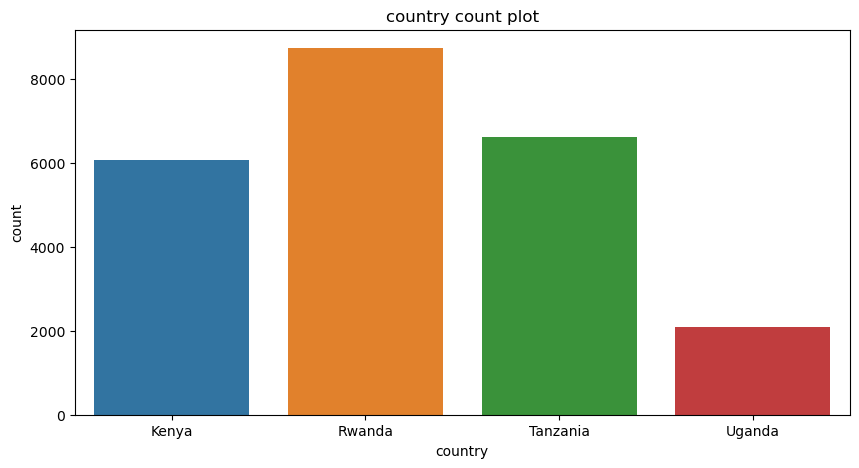

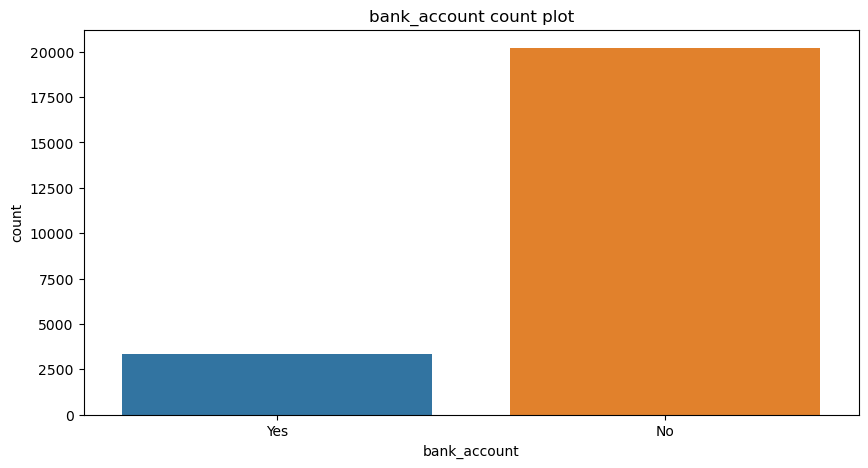

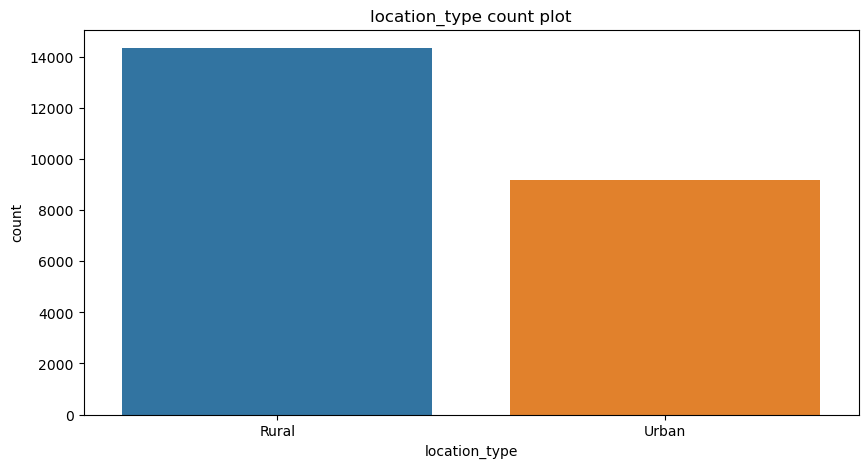

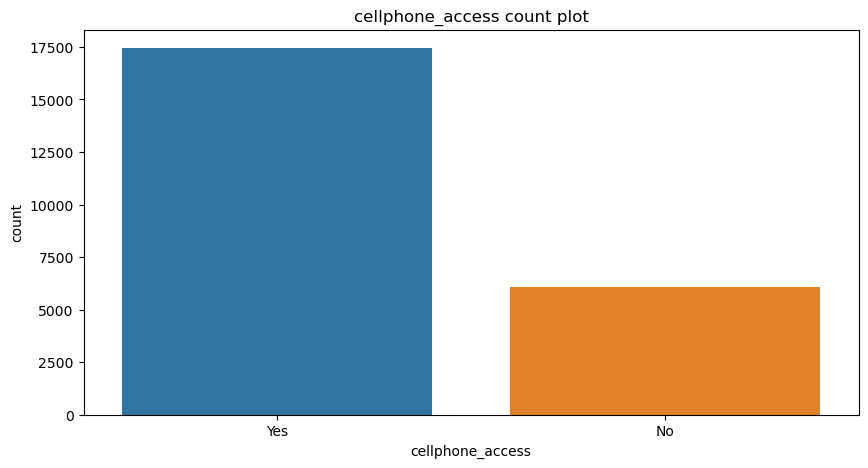

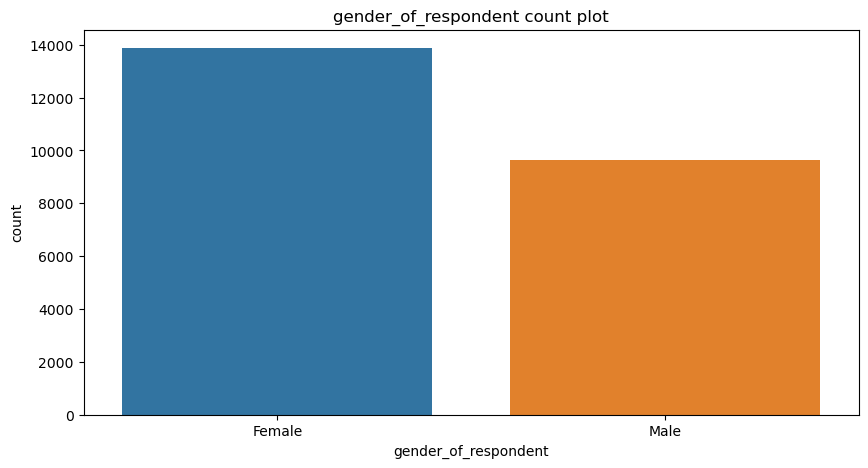

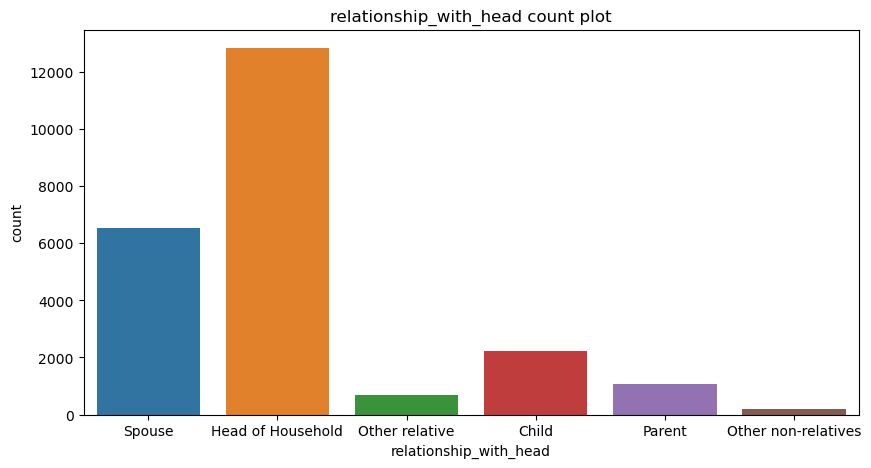

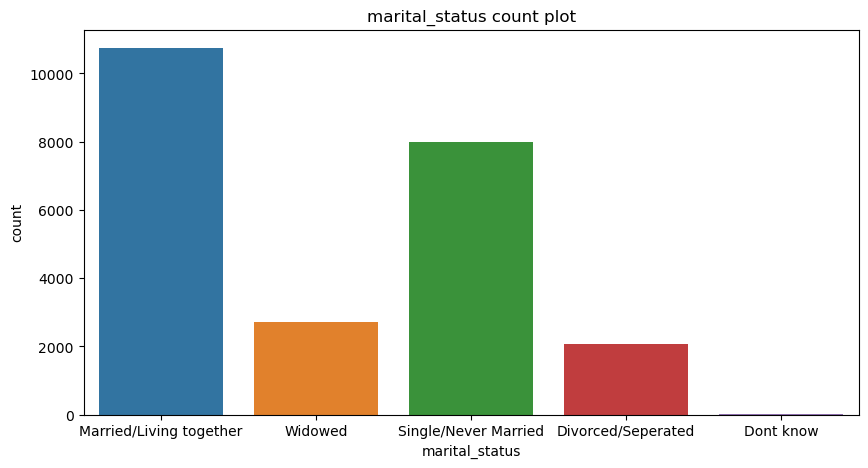

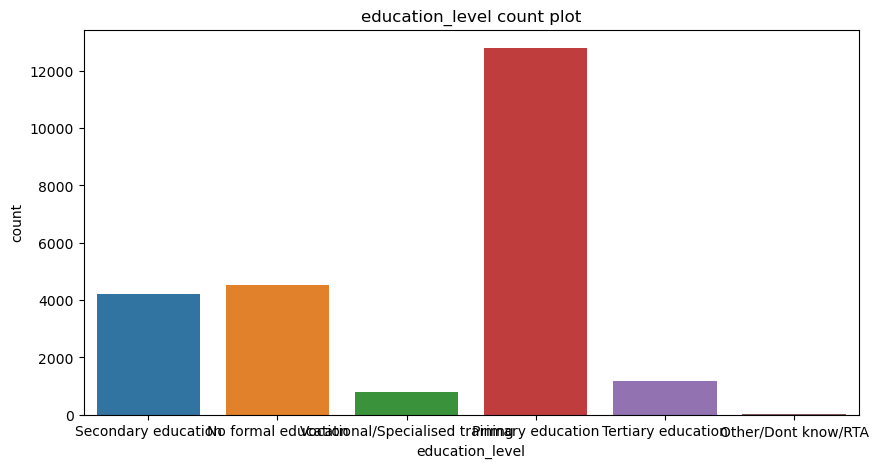

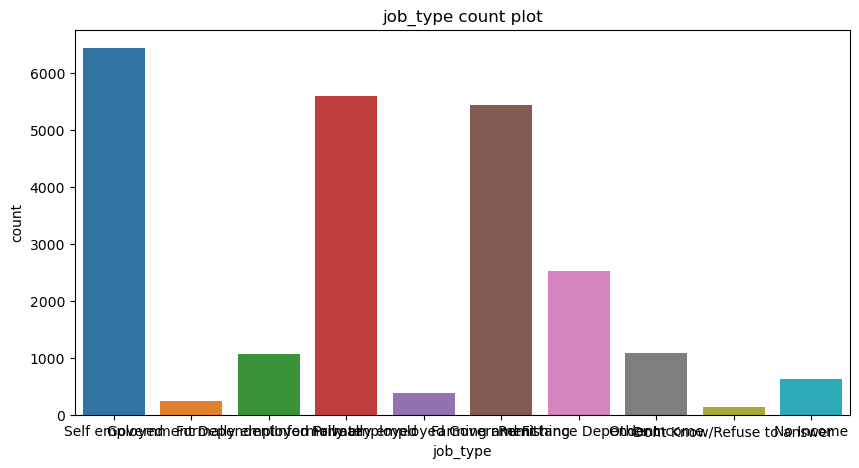

In [15]:
# performing count plot for every feature in the data
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=train[col])
    plt.title(f'{col} count plot')
    plt.show()

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'household_size'}>],
       [<Axes: title={'center': 'age_of_respondent'}>, <Axes: >]],
      dtype=object)

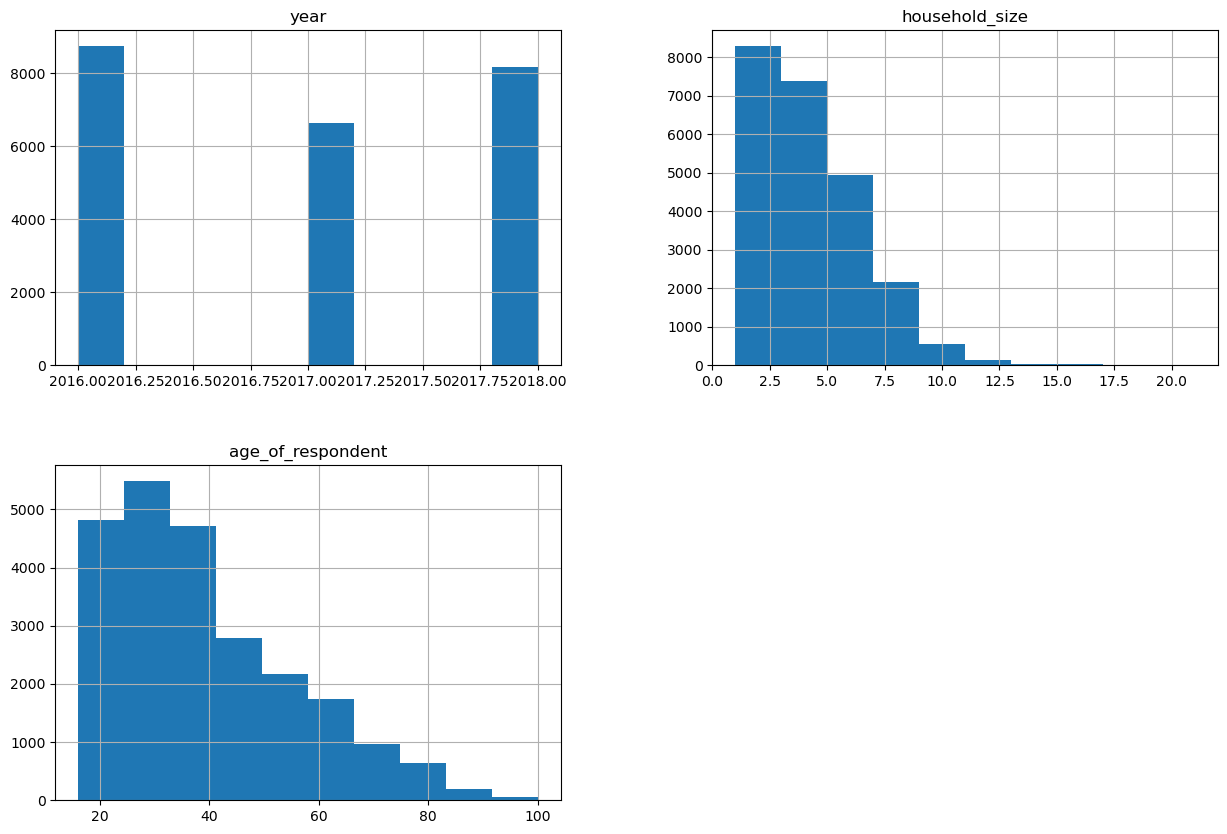

In [16]:
# histogram plot for the numerical columns
train.hist(figsize=(15, 10))

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'household_size'}>],
       [<Axes: title={'center': 'age_of_respondent'}>,
        <Axes: title={'center': 'log_age_of_respondent'}>],
       [<Axes: title={'center': 'log_household_size'}>, <Axes: >]],
      dtype=object)

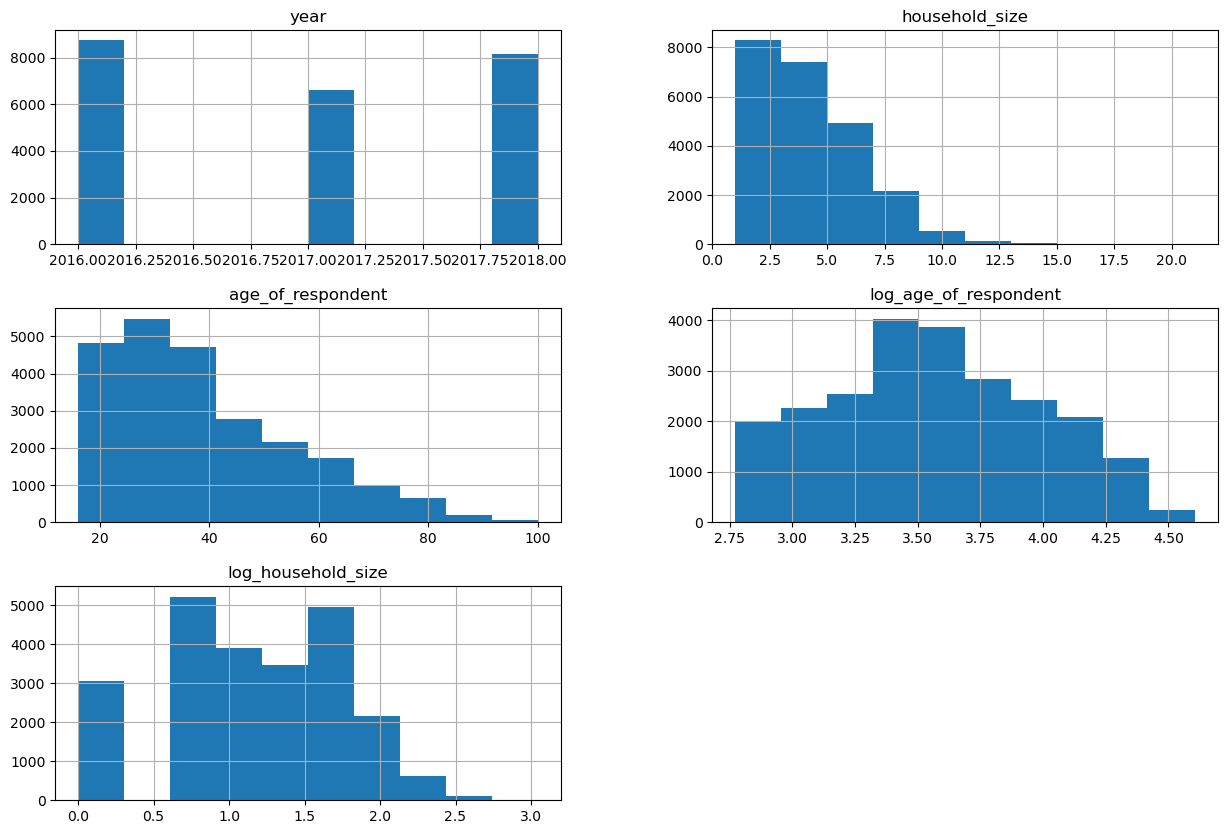

In [19]:
# trying log transformation on the age_of_respondent column and househol_size column
train['log_age_of_respondent'] = np.log(train['age_of_respondent'])
train['log_household_size'] = np.log(train['household_size'])

train.hist(figsize=(15, 10))


Performing log transformation on the data makes it much more distributed.

In [20]:
train.describe()

,year,household_size,age_of_respondent,log_age_of_respondent,log_household_size
count,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220,3.571351,1.151712
std,0.847371,2.227613,16.520569,0.417787,0.630161
min,2016.000000,1.000000,16.000000,2.772589,0.000000
25%,2016.000000,2.000000,26.000000,3.258097,0.693147
50%,2017.000000,3.000000,35.000000,3.555348,1.098612
75%,2018.000000,5.000000,49.000000,3.891820,1.609438
max,2018.000000,21.000000,100.000000,4.605170,3.044522


In [21]:
# dropping the original columns
train_1 = train.drop(columns=['age_of_respondent', 'household_size'])

In [22]:
train_1

,country,year,uniqueid,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,log_age_of_respondent,log_household_size
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed,3.178054,1.098612
1,Kenya,2018,uniqueid_2,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent,4.248495,1.609438
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,3.258097,1.609438
3,Kenya,2018,uniqueid_4,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,3.526361,1.609438
4,Kenya,2018,uniqueid_5,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed,3.258097,2.079442
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,Female,Head of Household,Divorced/Seperated,No formal education,Other Income,3.871201,1.386294
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,Female,Head of Household,Single/Never Married,Secondary education,Other Income,3.295837,0.693147
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,Female,Parent,Widowed,Primary education,Other Income,3.295837,1.609438
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,Female,Parent,Divorced/Seperated,Secondary education,Self employed,3.401197,1.945910


In [159]:
# train_1 fetaures and target
train_2 = train_1.drop(columns=['bank_account', 'uniqueid'])
# uaing log transformation on the test data
test['log_age_of_respondent'] = np.log(test['age_of_respondent'])
test['log_household_size'] = np.log(test['household_size'])

# dropping the original columns
test_1 = test.drop(columns=['age_of_respondent', 'household_size'])
test_2 = test_1.drop(columns=['uniqueid'])

In [160]:
train_2

,country,year,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,log_age_of_respondent,log_household_size
0,Kenya,2018,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed,3.178054,1.098612
1,Kenya,2018,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent,4.248495,1.609438
2,Kenya,2018,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,3.258097,1.609438
3,Kenya,2018,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,3.526361,1.609438
4,Kenya,2018,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed,3.258097,2.079442
...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,Rural,Yes,Female,Head of Household,Divorced/Seperated,No formal education,Other Income,3.871201,1.386294
23520,Uganda,2018,Rural,Yes,Female,Head of Household,Single/Never Married,Secondary education,Other Income,3.295837,0.693147
23521,Uganda,2018,Rural,Yes,Female,Parent,Widowed,Primary education,Other Income,3.295837,1.609438
23522,Uganda,2018,Urban,Yes,Female,Parent,Divorced/Seperated,Secondary education,Self employed,3.401197,1.945910


In [161]:
test_2

,country,year,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,log_age_of_respondent,log_household_size
0,Kenya,2018,Urban,Yes,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,3.401197,1.098612
1,Kenya,2018,Urban,Yes,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,3.931826,1.945910
2,Kenya,2018,Rural,No,Female,Parent,Married/Living together,No formal education,Remittance Dependent,4.343805,1.098612
3,Kenya,2018,Rural,No,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,3.663562,1.791759
4,Kenya,2018,Urban,No,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,2.772589,1.098612
...,...,...,...,...,...,...,...,...,...,...,...
10081,Uganda,2018,Rural,No,Female,Spouse,Married/Living together,Primary education,Self employed,4.127134,0.693147
10082,Uganda,2018,Urban,Yes,Male,Head of Household,Married/Living together,Primary education,Self employed,3.737670,2.079442
10083,Uganda,2018,Urban,Yes,Male,Head of Household,Single/Never Married,Secondary education,Other Income,3.663562,0.000000
10084,Uganda,2018,Rural,Yes,Female,Spouse,Married/Living together,Primary education,Self employed,3.332205,1.791759


## Preprocessing

In [162]:
# encoding cat features with label encoding
from sklearn.preprocessing import OrdinalEncoder
label_enc = OrdinalEncoder()

# cat columns
cat_cols = [col for col in train_2.columns if train_2[col].dtype == 'object']
# adding the year column to the cat cols
cat_cols.append('year')
cat_cols

['country',
 'location_type',
 'cellphone_access',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type',
 'year']

In [163]:
# encoding the train set
train_2[cat_cols] = label_enc.fit_transform(train_2[cat_cols])
# encoding the test set
test_2[cat_cols] = label_enc.transform(test_2[cat_cols])

In [164]:
train_2

,country,year,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,log_age_of_respondent,log_household_size
0,0.0,2.0,0.0,1.0,0.0,5.0,2.0,3.0,9.0,3.178054,1.098612
1,0.0,2.0,0.0,0.0,0.0,1.0,4.0,0.0,4.0,4.248495,1.609438
2,0.0,2.0,1.0,1.0,1.0,3.0,3.0,5.0,9.0,3.258097,1.609438
3,0.0,2.0,0.0,1.0,0.0,1.0,2.0,2.0,3.0,3.526361,1.609438
4,0.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0,5.0,3.258097,2.079442
...,...,...,...,...,...,...,...,...,...,...,...
23519,3.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,7.0,3.871201,1.386294
23520,3.0,2.0,0.0,1.0,0.0,1.0,3.0,3.0,7.0,3.295837,0.693147
23521,3.0,2.0,0.0,1.0,0.0,4.0,4.0,2.0,7.0,3.295837,1.609438
23522,3.0,2.0,1.0,1.0,0.0,4.0,0.0,3.0,9.0,3.401197,1.945910


In [165]:
test_2

,country,year,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,log_age_of_respondent,log_household_size
0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,3.401197,1.098612
1,0.0,2.0,1.0,1.0,1.0,1.0,2.0,5.0,3.0,3.931826,1.945910
2,0.0,2.0,0.0,0.0,0.0,4.0,2.0,0.0,8.0,4.343805,1.098612
3,0.0,2.0,0.0,0.0,0.0,1.0,2.0,2.0,8.0,3.663562,1.791759
4,0.0,2.0,1.0,0.0,1.0,0.0,3.0,3.0,8.0,2.772589,1.098612
...,...,...,...,...,...,...,...,...,...,...,...
10081,3.0,2.0,0.0,0.0,0.0,5.0,2.0,2.0,9.0,4.127134,0.693147
10082,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,9.0,3.737670,2.079442
10083,3.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,7.0,3.663562,0.000000
10084,3.0,2.0,0.0,1.0,0.0,5.0,2.0,2.0,9.0,3.332205,1.791759


In [166]:
# engineeering new features
train_2['age_household'] = train_2['log_age_of_respondent'] * train_2['log_household_size']
test_2['age_household'] = test_2['log_age_of_respondent'] * test_2['log_household_size']
# # taking a division
# train_2['age_div_household'] = train_2['log_age_of_respondent'] / train_2['log_household_size']
# test_2['age_div_household'] = test_2['log_age_of_respondent'] / test_2['log_household_size']


In [167]:
cols = train_2.columns
cols

Index(['country', 'year', 'location_type', 'cellphone_access',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type', 'log_age_of_respondent',
       'log_household_size', 'age_household'],
      dtype='object')

## Training Model

In [168]:
# encoding the target
target = train_1['bank_account']
# encoding the target
target = target.map({'Yes': 1, 'No': 0})
target

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64

In [169]:
# scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_2 = scaler.fit_transform(train_2)
test_2 = scaler.transform(test_2)

In [170]:
# split train_2 into train and trst set
X_train, X_test, y_train, y_test = train_test_split(train_2, target, test_size=0.2, random_state=42)

In [171]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error

In [172]:
# logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_pred = log_reg.predict(X_test)
print(f'Accuracy score for logistic regression: {accuracy_score(y_test, log_pred)}')
print(f'Classification report for logistic regression: \n{classification_report(y_test, log_pred)}')

# mae weeoe
print(f'Mean absolute error for logistic regression: {mean_absolute_error(y_test, log_pred)}')

Accuracy score for logistic regression: 0.8788522848034006
Classification report for logistic regression: 
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      4063
           1       0.66      0.23      0.34       642

    accuracy                           0.88      4705
   macro avg       0.77      0.61      0.64      4705
weighted avg       0.86      0.88      0.85      4705

Mean absolute error for logistic regression: 0.12114771519659936


In [173]:
# decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print(f'Accuracy score for decision tree: {accuracy_score(y_test, dt_pred)}')
print(f'Classification report for decision tree: \n{classification_report(y_test, dt_pred)}')

# mae 
print(f'Mean absolute error for decision tree: {mean_absolute_error(y_test, dt_pred)}')

Accuracy score for decision tree: 0.8412327311370882
Classification report for decision tree: 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      4063
           1       0.42      0.40      0.41       642

    accuracy                           0.84      4705
   macro avg       0.66      0.66      0.66      4705
weighted avg       0.84      0.84      0.84      4705

Mean absolute error for decision tree: 0.1587672688629118


In [174]:
# svc
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print(f'Accuracy score for svc: {accuracy_score(y_test, svc_pred)}')
print(f'Classification report for svc: \n{classification_report(y_test, svc_pred)}')

# mae
print(f'Mean absolute error for svc: {mean_absolute_error(y_test, svc_pred)}')

Accuracy score for svc: 0.8814027630180659
Classification report for svc: 
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      4063
           1       0.73      0.21      0.32       642

    accuracy                           0.88      4705
   macro avg       0.81      0.60      0.63      4705
weighted avg       0.87      0.88      0.85      4705

Mean absolute error for svc: 0.11859723698193411


In [175]:
# xgboost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print(f'Accuracy score for xgboost: {accuracy_score(y_test, xgb_pred)}')
print(f'Classification report for xgboost: \n{classification_report(y_test, xgb_pred)}')

# mae
print(f'Mean absolute error for xgboost: {mean_absolute_error(y_test, xgb_pred)}')

Accuracy score for xgboost: 0.8869287991498406
Classification report for xgboost: 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4063
           1       0.64      0.39      0.49       642

    accuracy                           0.89      4705
   macro avg       0.77      0.68      0.71      4705
weighted avg       0.87      0.89      0.87      4705

Mean absolute error for xgboost: 0.11307120085015941


In [176]:
# catboodt classifier
cat = CatBoostClassifier(random_state=42, verbose=0)
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_test)
print(f'Accuracy score for catboost: {accuracy_score(y_test, cat_pred)}')
print(f'Classification report for catboost: \n{classification_report(y_test, cat_pred)}')

# mae
print(f'Mean absolute error for catboost: {mean_absolute_error(y_test, cat_pred)}')

Accuracy score for catboost: 0.8930924548352817
Classification report for catboost: 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4063
           1       0.69      0.39      0.50       642

    accuracy                           0.89      4705
   macro avg       0.80      0.68      0.72      4705
weighted avg       0.88      0.89      0.88      4705

Mean absolute error for catboost: 0.10690754516471838


In [177]:
cat.feature_importances_

array([ 9.34779867,  4.57440821,  5.38034208, 14.63357413,  3.37023402,
        4.55887115,  4.24706373, 13.49386235, 12.54320056, 15.8872015 ,
        2.28541348,  9.67803011])

In [178]:
len(cat.feature_importances_)

12

In [179]:
cols

Index(['country', 'year', 'location_type', 'cellphone_access',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type', 'log_age_of_respondent',
       'log_household_size', 'age_household'],
      dtype='object')

In [180]:
len(cols)

12

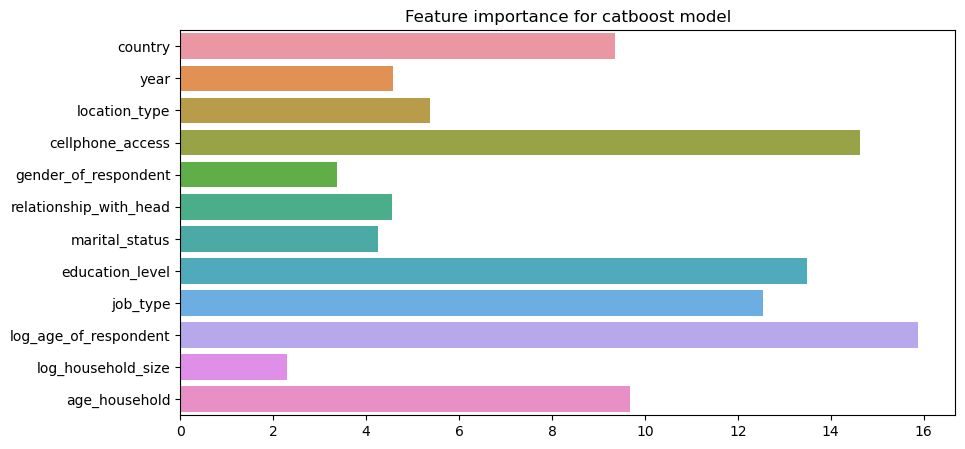

In [181]:
# a plot for feature importance for the catboost model
plt.figure(figsize=(10, 5))
sns.barplot(x=cat.feature_importances_, y=cols)
plt.title('Feature importance for catboost model')
plt.show()

In [182]:
# lightgbm
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)
print(f'Accuracy score for lightgbm: {accuracy_score(y_test, lgbm_pred)}')
print(f'Classification report for lightgbm: \n{classification_report(y_test, lgbm_pred)}')

# mae
print(f'Mean absolute error for lightgbm: {mean_absolute_error(y_test, lgbm_pred)}')

[LightGBM] [Info] Number of positive: 2670, number of negative: 16149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 395
[LightGBM] [Info] Number of data points in the train set: 18819, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.141878 -> initscore=-1.799780
[LightGBM] [Info] Start training from score -1.799780
Accuracy score for lightgbm: 0.8894792773645058
Classification report for lightgbm: 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4063
           1       0.67      0.37      0.48       642

    accuracy                           0.89      4705
   macro avg       0.79      0.67      0.71      4705
weighted avg       0.88      0.89      0.88      4705

Mean absolute error for lightgbm: 0.11052072263549416


In [198]:
import optuna
from optuna.samplers import TPESampler
from catboost import CatBoostClassifier
from sklearn.metrics import log_loss

# Define the objective function for optimization with log loss
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.5),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.01, 100.0),
        'random_strength': trial.suggest_loguniform('random_strength', 0.1, 10),
        'scale_pos_weight': trial.suggest_loguniform('scale_pos_weight', 0.1, 10)
    }

    model = CatBoostClassifier(**params, verbose=False)
    model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=False)
    catboost_pred_proba = model.predict_proba(X_test)
    
    return log_loss(y_test, catboost_pred_proba)

# Set up the sampler and study
sampler = TPESampler(seed=42)
study = optuna.create_study(direction='minimize', sampler=sampler)

# Optimize the objective function
study.optimize(objective, n_trials=100)

# Get the best parameters and best value
best_params = study.best_params
best_value = study.best_value

print("Best parameters:", best_params)
print("Best log loss:", best_value)


[I 2024-04-21 08:26:10,442] A new study created in memory with name: no-name-e9392989-177f-4d14-851c-f041cb437ed1
[I 2024-04-21 08:26:16,195] Trial 0 finished with value: 0.40395478311930216 and parameters: {'iterations': 437, 'depth': 10, 'learning_rate': 0.14553179565665345, 'l2_leaf_reg': 1.5751320499779735, 'border_count': 66, 'bagging_temperature': 0.042070539502879395, 'random_strength': 0.13066739238053282, 'scale_pos_weight': 5.3994844097874335}. Best is trial 0 with value: 0.40395478311930216.
[I 2024-04-21 08:26:41,192] Trial 1 finished with value: 0.33004777992108403 and parameters: {'iterations': 641, 'depth': 8, 'learning_rate': 0.005497167787383101, 'l2_leaf_reg': 8.706020878304859, 'border_count': 218, 'bagging_temperature': 0.07068974950624607, 'random_strength': 0.23102018878452935, 'scale_pos_weight': 0.2327067708383781}. Best is trial 1 with value: 0.33004777992108403.
[I 2024-04-21 08:26:49,930] Trial 2 finished with value: 0.2795605021410156 and parameters: {'itera

Best parameters: {'iterations': 782, 'depth': 5, 'learning_rate': 0.1304248977134803, 'l2_leaf_reg': 5.478433828935145, 'border_count': 100, 'bagging_temperature': 0.012693887797822065, 'random_strength': 1.3599916145512843, 'scale_pos_weight': 0.8910569484537938}
Best log loss: 0.26773535370515844


In [206]:
params = study.best_params
# lightgbm
cat_1 = CatBoostClassifier(**params)
cat_1.fit(X_train, y_train)
cat_1_pred = cat_1.predict(X_test)
print(f'Accuracy score for lightgbm: {accuracy_score(y_test, cat_1_pred)}')
print(f'Classification report for lightgbm: \n{classification_report(y_test, cat_1_pred)}')

# mae
print(f'Mean absolute error for lightgbm: {mean_absolute_error(y_test, cat_1_pred)}')

0:	learn: 0.5821017	total: 24.8ms	remaining: 19.4s
1:	learn: 0.5049261	total: 52.7ms	remaining: 20.6s
2:	learn: 0.4399243	total: 80ms	remaining: 20.8s
3:	learn: 0.3992885	total: 108ms	remaining: 20.9s
4:	learn: 0.3677106	total: 134ms	remaining: 20.8s
5:	learn: 0.3454488	total: 166ms	remaining: 21.5s
6:	learn: 0.3293473	total: 194ms	remaining: 21.4s
7:	learn: 0.3190686	total: 219ms	remaining: 21.2s
8:	learn: 0.3093521	total: 249ms	remaining: 21.4s
9:	learn: 0.3025740	total: 287ms	remaining: 22.1s
10:	learn: 0.2970435	total: 311ms	remaining: 21.8s
11:	learn: 0.2915424	total: 343ms	remaining: 22s
12:	learn: 0.2889309	total: 368ms	remaining: 21.8s
13:	learn: 0.2854634	total: 407ms	remaining: 22.3s
14:	learn: 0.2834226	total: 442ms	remaining: 22.6s
15:	learn: 0.2816259	total: 479ms	remaining: 22.9s
16:	learn: 0.2796870	total: 521ms	remaining: 23.5s
17:	learn: 0.2778156	total: 556ms	remaining: 23.6s
18:	learn: 0.2763780	total: 587ms	remaining: 23.6s
19:	learn: 0.2757192	total: 617ms	remainin

In [200]:
test_2

array([[0.        , 1.        , 1.        , ..., 0.34301813, 0.36084881,
        0.30099491],
       [0.        , 1.        , 1.        , ..., 0.63257047, 0.63915119,
        0.61631097],
       [0.        , 1.        , 0.        , ..., 0.85737891, 0.36084881,
        0.38441266],
       ...,
       [1.        , 1.        , 1.        , ..., 0.48618462, 0.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.30537021, 0.58851906,
        0.48094368],
       [1.        , 1.        , 1.        , ..., 0.        , 0.63915119,
        0.43460138]])

In [201]:
# predicting on the test set
test_pred = cat_1.predict(test_2)

# creating a submission file
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"]})

submission

,uniqueid
0,uniqueid_6056 x Kenya
1,uniqueid_6060 x Kenya
2,uniqueid_6065 x Kenya
3,uniqueid_6072 x Kenya
4,uniqueid_6073 x Kenya
...,...
10081,uniqueid_2998 x Uganda
10082,uniqueid_2999 x Uganda
10083,uniqueid_3000 x Uganda
10084,uniqueid_3001 x Uganda


In [202]:
submission['bank_account'] = test_pred

In [203]:
submission

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0
...,...,...
10081,uniqueid_2998 x Uganda,0
10082,uniqueid_2999 x Uganda,0
10083,uniqueid_3000 x Uganda,0
10084,uniqueid_3001 x Uganda,0


In [204]:
submission.to_csv('sub_5.csv', index=False)